This notebook is created by **Sintaks Group**, with the following members:
1. Galang Setia Nugroho
2. Hasballah Askar
3. Khalishah Fiddina
4. Muhammad Ilham Hakiqi
5. Tifani Amalina

# Data Cleansing
In this notebook, we will show you about Data Cleansing on Titanic dataset in Python.

First, import the libraries that are needed:
- **pandas**, for data manipulation and analysis
- **numpy**, used for working with arrays
- **matplotlib** and **seaborn** for visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

If you're using Google Colab, use this code below to upload the data file:

In [ ]:
from google.colab import files
files.upload()

Create a data frame and load the data of Titanic dataset

In [ ]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Show only the top 10 rows of the loaded dataset

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Show insight about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Column 'Age'

The total data entry is 891 rows, meanwhile column 'Age' only has 714 rows.<br>
This means column 'Age' has null values, so imputation needs to be done on this column.

Show visualization of the data in column 'Age' in histogram

<AxesSubplot:ylabel='Frequency'>

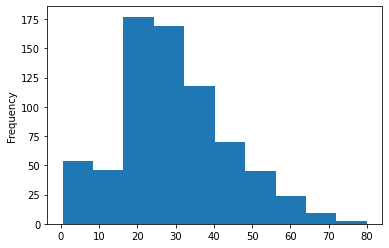

In [ ]:
df.Age.plot(kind = 'hist')

Show summary statistics of column 'Age'

In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Because the data distribution of column 'Age' is skewed, imputation is done using median.<br>
The code below is used to fill the null-value with the median.

In [ ]:
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

Show the dataset information to see whether the imputation on column 'Age' has been done or not.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Column 'Cabin'

The total data entry is 891 rows, meanwhile column 'Cabin' only has 204 rows.<br>
This means column 'Cabin' has null values.

Show the proportions of the data in column 'Cabin'

In [ ]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

As you can see, there are too many unique data in 'Cabin' column. <br>Plus, the information in 'Cabin' column is not very useful in determining the survived data. <br>Therefore, we can delete 'Cabin' column.

Use the code below to permanently delete the 'Cabin' column

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

Show the dataset information to see whether column 'Cabin' has been deleted or not.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Column 'Embarked'

The total data entry is 891 rows, meanwhile column 'Embarked' only has 889 rows.<br>
This means column 'Embarked' has null values, so imputation needs to be done on this column.

Check the location or index of the null values

In [ ]:
df.Embarked[df.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

Show the proportions of the data in column 'Embarked'. As you can see, column 'Embarked' is categorial data.

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

If we want to do imputation on column 'Embarked', we need to check the data type of column 'Embarked' first. <br>
Because the data type of column 'Age' is categorial, imputation is done using mode.

As you can see, 'S' is the data that appears most often, then 'S' is the mode of this coloumn.<br>
The code below is used to fill the null-value with the mode.

In [ ]:
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)

Show the proportions of the data in column 'Embarked' to see whether the imputation has been done or not.

In [ ]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

As we can see, the proportion has changed

## Column `SibSp` dan Column `Parch`

Here, we will do data manipulation to make the data easier to read by the machine.

Column 'SibSp' (Sibling Spouse), states the number of siblings or spouses brought by passenger.
Column 'Parch' (Parent Children), states the number of parents or children brought by passenger.


We will create a new column called 'Alone' which states whether the passenger is alone or with family.

In [ ]:
df['Alone'] = df['SibSp']+df['Parch']

In [ ]:
df['Alone'][df['Alone']>0] = 'With Family'
df['Alone'][df['Alone']==0] = 'Without Family'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Show only the top rows of the latest dataset

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


## Relations Between Column `Sex` and Column `Survived`

Check the data proportion of column 'Sex' that survived.

In [ ]:
df['Sex'][df['Survived']==1].value_counts()

female    233
male      109
Name: Sex, dtype: int64

Display the data visualization of column 'Sex' that survived.

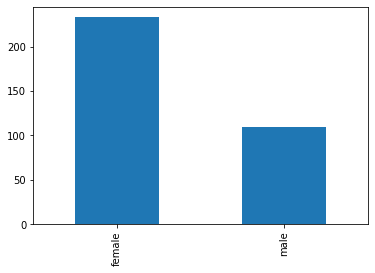

In [ ]:
df['Sex'][df['Survived']==1].value_counts().plot(kind='bar')

Check the data proportion of column 'Sex' that is not survived.

In [ ]:
df['Sex'][df['Survived']==0].value_counts()

male      468
female     81
Name: Sex, dtype: int64

Display the data visualization of column 'Sex' that is not survived.

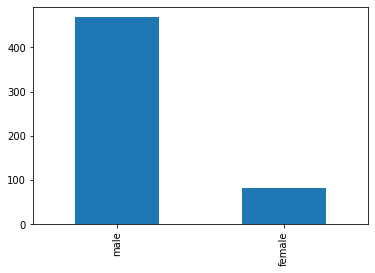

In [ ]:
df['Sex'][df['Survived']==0].value_counts().plot(kind='bar')